In [1]:
import sys
sys.path.append("../")

# 1. Load metadata

In [2]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("../datasets/multi_table_demo/metadata.json")

print(metadata)

tables:
{'table1': {'columns': {'id1': {'type': 'id'}, 'name1': {'type': 'categorical'}, 'age1': {'type': 'numerical'}, 'id12': {'type': 'id'}, 'id13': {'type': 'id'}}, 'primary_key': 'id1'}, 'table2': {'columns': {'id21': {'type': 'id'}, 'name2': {'type': 'categorical'}, 'age2': {'type': 'numerical'}}, 'primary_key': 'id21'}, 'table3': {'columns': {'id31': {'type': 'id'}, 'name3': {'type': 'categorical'}, 'age3': {'type': 'numerical'}}, 'primary_key': 'id31'}}
relationships:
[{'parent_table_name': 'table1', 'child_table_name': 'table2', 'parent_foreign_key': 'id12', 'child_primary_key': 'id21'}, {'parent_table_name': 'table1', 'child_table_name': 'table3', 'parent_foreign_key': 'id13', 'child_primary_key': 'id31'}]


# 2. Load data

In [3]:
import pandas as pd

data = {
    "table1": pd.read_csv("../datasets/multi_table_demo/table1.csv"),
    "table2": pd.read_csv("../datasets/multi_table_demo/table2.csv"),
    "table3": pd.read_csv("../datasets/multi_table_demo/table3.csv")
}

merged_data = pd.merge(pd.merge(data["table1"], data["table2"], left_on="id12", right_on="id21"), data["table3"], left_on="id13", right_on="id31")
merged_data.head(10)

,id1,name1,age1,id12,id13,id21,name2,age2,id31,name3,age3
0,0,tha,28,0,0,0,VQK,42,0,iQw,44
1,50,mTL,32,10,0,10,ieg,46,0,iQw,44
2,20,xRJ,43,0,20,0,VQK,42,20,rHZ,35
3,70,Iai,34,10,20,10,ieg,46,20,rHZ,35
4,40,kiJ,29,0,40,0,VQK,42,40,XeK,23
5,90,wOF,48,10,40,10,ieg,46,40,XeK,23
6,60,fuB,28,0,10,0,VQK,42,10,iRh,27
7,10,cRB,22,10,10,10,ieg,46,10,iRh,27
8,80,AWi,42,0,30,0,VQK,42,30,llU,20
9,30,sxK,24,10,30,10,ieg,46,30,llU,20


# 3. Data Conversion

In [4]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# 4. Data synthesizer

In [5]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer
from relgen.utils.enum_type import SynthesisMethod

synthesizer = MADESynthesizer(dataset, method=SynthesisMethod.MULTI_MODEL)
# synthesizer = MADESynthesizer(dataset, method=SynthesisMethod.SINGLE_MODEL)
synthesizer.fit(data)

table table1 start training
epoch 0: train loss 19.713, time cost 0.005s
epoch 1: train loss 19.508, time cost 0.004s
epoch 2: train loss 19.502, time cost 0.005s
epoch 3: train loss 19.466, time cost 0.005s
epoch 4: train loss 19.424, time cost 0.004s
epoch 5: train loss 19.112, time cost 0.004s
epoch 6: train loss 19.083, time cost 0.004s
epoch 7: train loss 19.360, time cost 0.004s
epoch 8: train loss 18.973, time cost 0.004s
epoch 9: train loss 18.744, time cost 0.004s
epoch 10: train loss 18.491, time cost 0.003s
epoch 11: train loss 18.923, time cost 0.004s
epoch 12: train loss 18.338, time cost 0.004s
epoch 13: train loss 18.662, time cost 0.004s
epoch 14: train loss 18.849, time cost 0.004s
epoch 15: train loss 18.116, time cost 0.004s
epoch 16: train loss 19.168, time cost 0.005s
epoch 17: train loss 18.415, time cost 0.004s
epoch 18: train loss 18.377, time cost 0.004s
epoch 19: train loss 18.936, time cost 0.004s
epoch 20: train loss 18.904, time cost 0.004s
epoch 21: train 

# 5. Generate data

In [6]:
sampled_data = synthesizer.sample()

merged_sampled_data = pd.merge(pd.merge(sampled_data["table1"], sampled_data["table2"], left_on="id12", right_on="id21"), sampled_data["table3"], left_on="id13", right_on="id31")
merged_sampled_data.head(10)

,id1,name1,age1,id12,id13,id21,name2,age2,id31,name3,age3
0,0,Eal,30,6,70,6,ZEa,24,70,YvV,33
1,1,erE,45,8,45,8,yXt,50,45,MYX,23
2,2,KNb,32,69,33,69,xGc,28,33,WKc,22
3,3,tbK,33,64,30,64,yXt,50,30,SbJ,20
4,4,eLC,20,11,38,11,QJT,29,38,iRh,33
5,5,Jao,43,2,58,2,WyC,50,58,fNs,36
6,6,jiz,36,83,43,83,PLX,33,43,AfC,50
7,7,Rmm,25,67,37,67,cxz,37,37,szY,33
8,8,GNi,30,18,14,18,yXt,50,14,Inc,24
9,9,GNi,47,60,74,60,yXt,37,74,YRG,27


# 6. Evaluate the generated data

In [7]:
from relgen.evaluator import Evaluator

evaluator = Evaluator(merged_data, merged_sampled_data)

matplotlib data path: /Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data
CONFIGDIR=/Users/zhangzhewei/.matplotlib
interactive is False
platform is darwin
loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_io', 'marshal', 'posix', '_frozen_importlib_external', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'contextlib', 'importlib.util', 'mpl_toolkits', 'site', '_weakrefset', 'weakre

In [8]:
evaluator.eval_fidelity()

{'JS_distance Mean': 0.2905965211125641,
 'JS_distance Std': 0.10129403696195129,
 'JS_distance Max': 0.4204453605435074,
 'JS_distance Min': 0.1732776163829084,
 'WD_distance Mean': 16.236250000000002,
 'WD_distance Std': 16.662946121184575,
 'WD_distance Max': 39.75,
 'WD_distance Min': 0.0,
 'Diff.Corr Mean': 0.18528823772993597,
 'Discriminator Measure': 0.625}

In [9]:
evaluator.eval_privacy()

{'DCR 5 percentile': 0.08723519464581188,
 'NNDR 5 percentile': 0.5291301172065378}

In [10]:
evaluator.eval_diversity()

{'Sampling Diversity': 0.36}

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=7

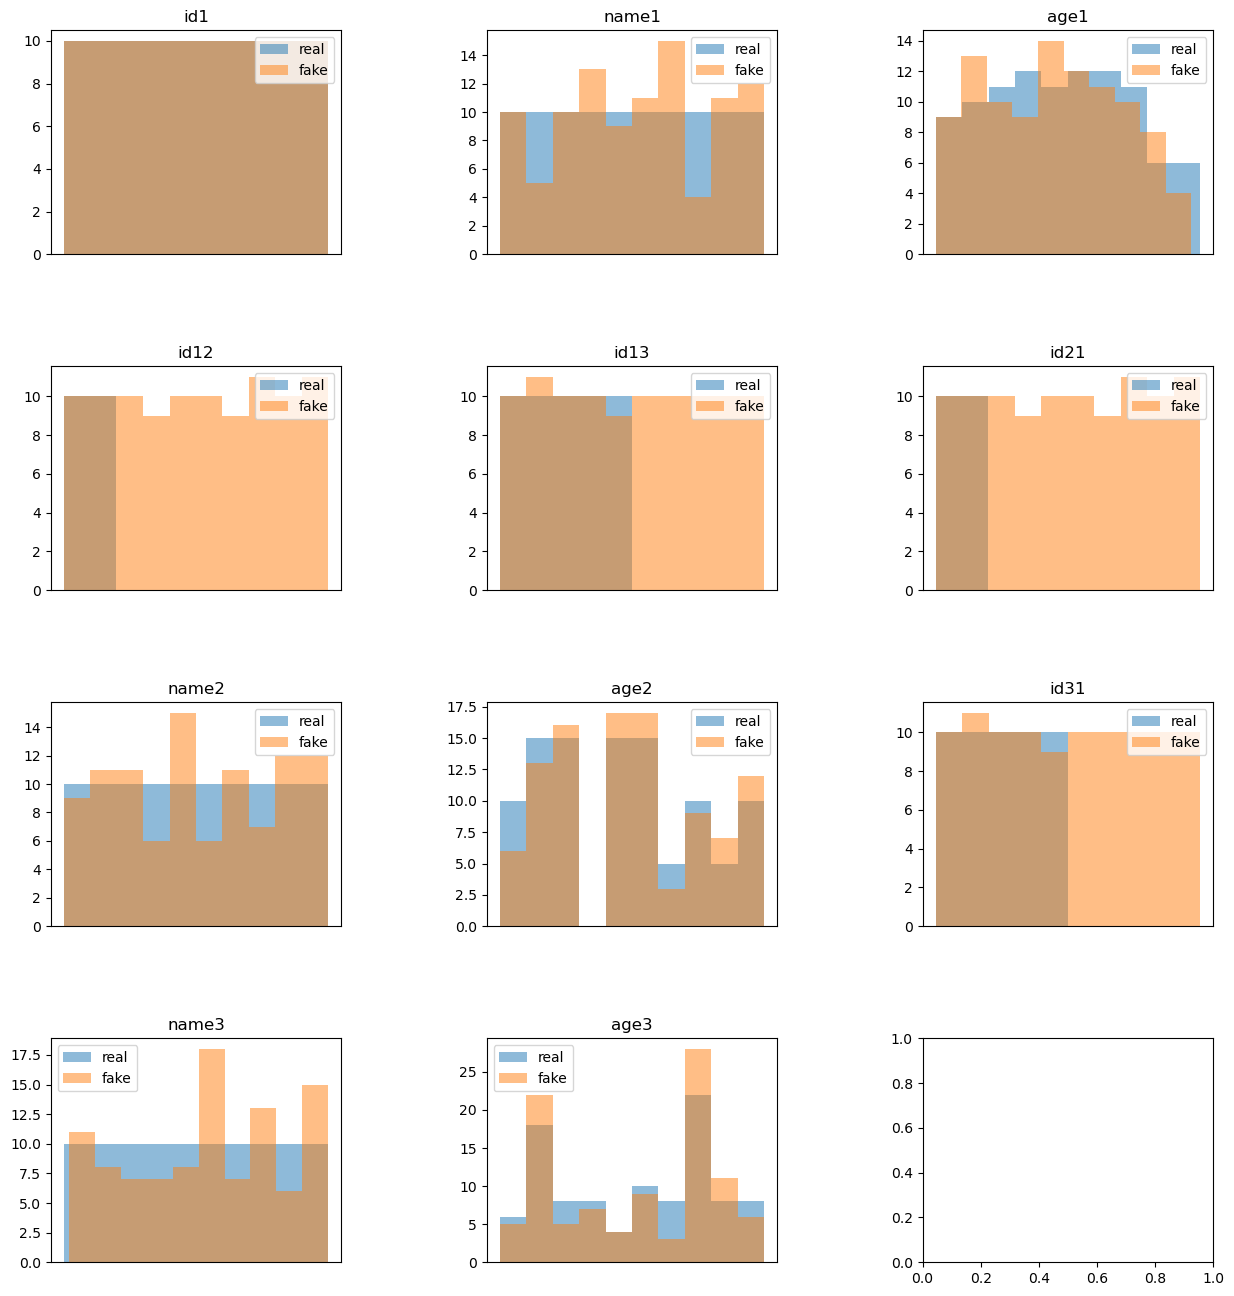

In [11]:
evaluator.eval_histogram()

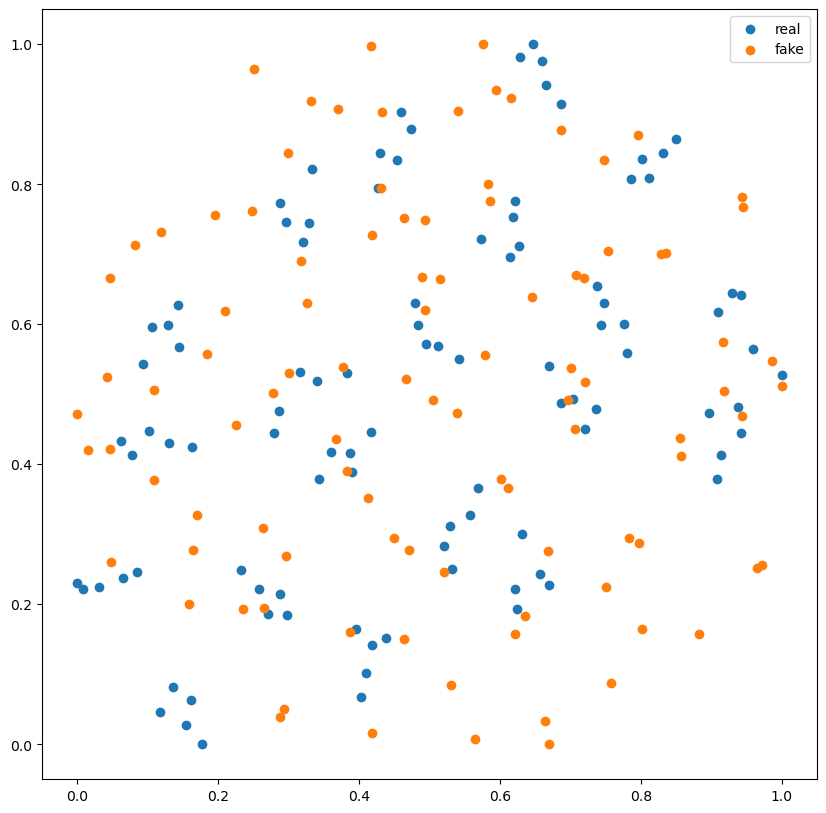

In [12]:
evaluator.eval_tsne()